In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb 
from sklearn.datasets import load_iris


In [14]:
iris = load_iris()

In [15]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [16]:
targets=iris.target_names
targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'),df.target,train_size=0.8)

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predicted=model.predict(X_test)
predicted

array([2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       2, 2, 2, 0, 2, 2, 1, 2])

In [30]:
y_test

110    2
90     1
21     0
20     0
141    2
83     1
22     0
119    2
134    2
97     1
56     1
142    2
35     0
32     0
26     0
74     1
133    2
3      0
13     0
126    2
14     0
47     0
145    2
118    2
105    2
40     0
100    2
131    2
60     1
132    2
Name: target, dtype: int32

In [34]:
model.score(X_train,y_train)

0.9833333333333333

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm=confusion_matrix(y_test,predicted)
cm

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  3, 10]], dtype=int64)

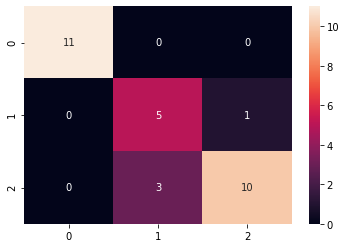

In [40]:
sb.heatmap(cm,annot=True)